Project Checkpoint 2: DATA MANIPULATION EXPLANATION

Total DC Power Generated Plant 1: Needed to see total amount of power generated and do calculations with that value
Total AC Power Generated Plant 1: Needed to see total amount of power generated and do calculations with that value
Total DC Power Generated Plant 2: Needed to see total amount of power generated and do calculations with that value
Total AC Power Generated Plant 2: Needed to see total amount of power generated and do calculations with that value
Duration: Needed for averages
Average DC/AC Power Generated: Needed to make comparisons between plants 
Standard Deviation of DC/AC Power: Needed to see if their is consistency in the efficiency of the solar cells
Bar graph of power generation: To see difference in DC/AC Power generation

Total DC Power Generated Plant 1: 216473680 kW
Total AC Power Generated Plant 1: 21170058 kW
Total DC Power Generated Plant 2: 16701229 kW
Total AC Power Generated Plant 2: 16334026 kW
Duration: 33 days
Average DC Power Generated for Plant 1: 6559808 kW
Average AC Power Generated for Plant 1: 641517 kW
Average DC Power Generated Plant 2: 494576
Average AC Power Generated Plant 2: 483685
Standard Deviation of DC Power Generation of Plant 1: 865919.264 kW
Standard Deviation of AC Power Generation of Plant 1: 84384.225 kW
Standard Deviation of DC Power Generation of Plant 2: 75351.253 kW
Standard Deviation of AC Power Generation of Plant 2: 73520.991 kW


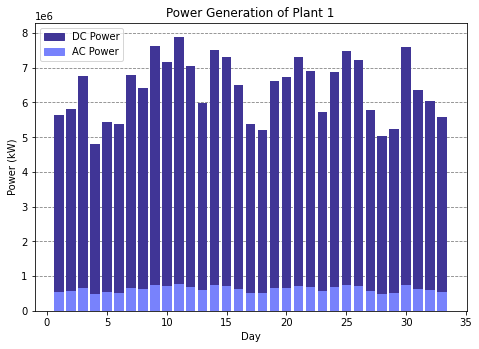

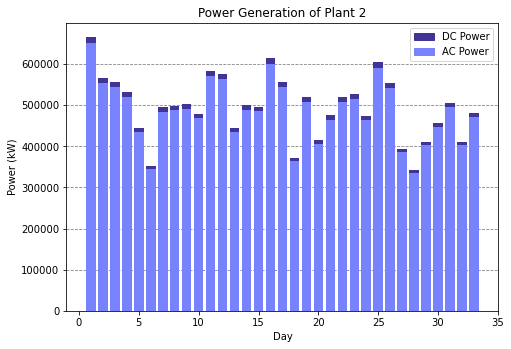

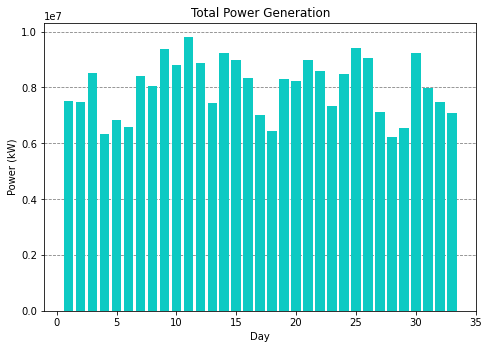

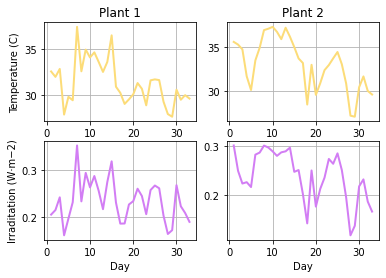

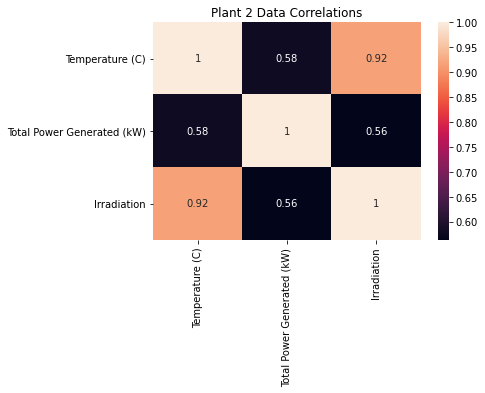

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# READING IN DATA

file1 = "Plant_1_Generation_Data.csv"
file2 = "Plant_1_Weather_Sensor_Data.csv"
file3 = "Plant_2_Generation_Data.csv"
file4 = "Plant_2_Weather_Sensor_Data.csv"

p1p = pd.read_csv("Plant_1_Generation_Data.csv") # p1p = Plant 1 Power
p1w = pd.read_csv("Plant_1_Weather_Sensor_Data.csv") # p1w = Plant 1 Weather
p2p = pd.read_csv("Plant_2_Generation_Data.csv") # p2p = Plant 2 Power
p2w = pd.read_csv("Plant_2_Weather_Sensor_Data.csv") # p2w = Plant 2 Weather

df1 = pd.DataFrame(p1p, index = None)
cols1 = len(df1.axes[1])
rows1 = len(df1.axes[0])

#print("Plant 1 Power Data Rows: " + str(rows1))

df2 = pd.DataFrame(p1w, index = None)
cols2 = len(df2.axes[1])
rows2 = len(df2.axes[0])
#print("Plant 1 Weather Data Rows: " + str(rows2))

df3 = pd.DataFrame(p2p, index = None)
cols3 = len(df3.axes[1])
rows3 = len(df3.axes[0])
#print("Plant 2 Power Data Rows: " + str(rows3))

df4 = pd.DataFrame(p2w, index = None)
cols4 = len(df4.axes[1])
rows4 = len(df4.axes[0])
#print("Plant 2 Power Data Rows: " + str(rows4))
#print("Total Columns: " + str(cols))

# DATA MANIPULATION

header = [] # List of column titles
for row in df1:
    header.append(row)
#print(header)

# TOTAL DC POWER GENERATED FOR PLANT 1
dc1 = df1.loc[:,"DC_POWER"]
i = 0
dc1_sum = 0
for col in dc1: # Index through daily yield column to sum values
    dc1_sum = dc1_sum + dc1[i]
    #print(dc1[i])
    i = i + 1
print("Total DC Power Generated Plant 1: " + str(round(dc1_sum)) + " kW")

# TOTAL AC POWER GENERATED FOR PLANT 1
ac1 = df1.loc[:,"AC_POWER"]
i = 0
ac1_sum = 0
for col in ac1: # Index through daily yield column to sum values
    ac1_sum = ac1_sum + ac1[i]
    #print(dc1[i])
    i = i + 1
print("Total AC Power Generated Plant 1: " + str(round(ac1_sum)) + " kW")

# TOTAL DC POWER GENERATED FOR PLANT 2
dc2 = df3.loc[:,"DC_POWER"]
i = 0
dc2_sum = 0
for col in dc2: # Index through daily yield column to sum values
    dc2_sum = dc2_sum + dc2[i]
    #print(dc1[i])
    i = i + 1
print("Total DC Power Generated Plant 2: " + str(round(dc2_sum)) + " kW")

# TOTAL AC POWER GENERATED FOR PLANT 2
ac2 = df3.loc[:,"AC_POWER"]
i = 0
ac2_sum = 0
for col in ac2: # Index through daily yield column to sum values
    ac2_sum = ac2_sum + ac2[i]
    #print(dc1[i])
    i = i + 1
print("Total AC Power Generated Plant 2: " + str(round(ac2_sum)) + " kW")

# AVERAGE DC POWER FOR PLANT 1
dt1 = df1.loc[:,"DATE_TIME"]
i = 0
num_days = 0;
for col in dt1:
    #print(dt1[i][0:10])
    if (i > 0 & i <= rows1-1):
        if dt1[i][0:10] != dt1[i-1][0:10]: # Counting the total number of days by looping and indexing part of date string
            #print(dt1[i][0:10]) 
            num_days = num_days + 1
    i = i + 1

print("Duration: " + str(num_days) + " days") # 33 days  

sum_pd = np.zeros(num_days) # Array of sum of DC Power from each individual day
sum_ac1 = np.zeros(num_days) # Array of sum of AC Power from each individual day
i = 0
x = 0
dcpd1 = 0 # Total DC variable
acpd1 = 0 # Total AC variable
for col in dt1:
    if i == 0:
        dcpd1 = dcpd1 + dc1[i]
        acpd1 = acpd1 + ac1[i] 
    if i >= 1:
        if dt1[i][0:10] == dt1[i-1][0:10]:
            dcpd1 = dcpd1 + dc1[i] #add DC power from same day
            acpd1 = acpd1 + ac1[i] #add AC power from same day
        if dt1[i][0:10] != dt1[i-1][0:10]:
            sum_pd[x] = round(dcpd1) #round
            sum_ac1[x] = round(acpd1)
            dcpd1 = 0 #reset value for end of day
            acpd1 = 0
            x = x + 1
    i = i + 1
#print(sum_pd) #print DC power array of each day
#print(len(sum_pd))
#print(dc1_sum)
#print(num_days) #for some reason this value changes since last use
avg_p1dc = round(dc1_sum/num_days) #calculate average
avg_p1ac = round(ac1_sum/num_days)
print("Average DC Power Generated for Plant 1: " + str(avg_p1dc) + " kW")
print("Average AC Power Generated for Plant 1: " + str(avg_p1ac) + " kW")

# AVERAGE DC POWER FOR PLANT 2
dt2 = df3.loc[:,"DATE_TIME"]
sum_dc2 = np.zeros(num_days) # Array of sum of DC Power from each individual day
sum_ac2 = np.zeros(num_days) # Array of sum of AC Power from each individual day
i = 0
x = 0
dcpd2 = 0
acpd2 = 0
for col in dt2:
    if i == 0:
        dcpd2 = dcpd2 + dc2[i]
        acpd2 = acpd2 + ac2[i]
    if i >= 1:
        if dt2[i][0:10] == dt2[i-1][0:10]:
            dcpd2 = dcpd2 + dc2[i] #add DC power from same day
            acpd2 = acpd2 + ac2[i] #add AC power from same day
        if dt2[i][0:10] != dt2[i-1][0:10]:
            sum_dc2[x] = round(dcpd2) #round
            sum_ac2[x] = round(acpd2)
            dcpd2 = 0 #reset value
            acpd2 = 0
            x = x + 1
    i = i + 1
avg_p2dc = round(sum(sum_dc2)/num_days) #calculate average
avg_p2ac = round(sum(sum_ac2)/num_days)
print("Average DC Power Generated Plant 2: " + str(avg_p2dc))
print("Average AC Power Generated Plant 2: " + str(avg_p2ac))

# STANDARD DEVIATION OF DC/AC POWER PLANT 1
dc1_std = np.std(sum_pd,dtype=np.float64) # standard deviation per day
dc1_std = round(dc1_std,3)
ac1_std = np.std(sum_ac1,dtype=np.float64) # standard deviation per day
ac1_std = round(ac1_std,3)
print("Standard Deviation of DC Power Generation of Plant 1: " + str(dc1_std) + " kW")
print("Standard Deviation of AC Power Generation of Plant 1: " + str(ac1_std) + " kW")

# STANDARD DEVIATION OF DC/AC POWER PLANT 2
dc2_std = np.std(sum_dc2,dtype=np.float64) # standard deviation per day
dc2_std = round(dc2_std,3)
ac2_std = np.std(sum_ac2,dtype=np.float64) # standard deviation per day
ac2_std = round(ac2_std,3)
print("Standard Deviation of DC Power Generation of Plant 2: " + str(dc2_std) + " kW")
print("Standard Deviation of AC Power Generation of Plant 2: " + str(ac2_std) + " kW")

# BAR GRAPH OF POWER GENERATED PER DAY FOR PLANT 1
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
days = np.arange(num_days) + 1 # array of days for bar graph
pdiff = sum_pd - sum_ac1
#plt.subplot(2, 1, 1)
#print(sum_pd)
#print(sum_ac1)
plt.bar(days, pdiff, bottom = sum_ac1, color = '#403596') # DC power bar
plt.bar(days, sum_ac1, color = '#7882FC') # AC power bar
#ax.bar(days,sum_pd)
#plt.plot(days, sum_pd, marker='', color='#FBA127', linewidth=2)
#plt.plot(days, sum_ac1, marker='', color='#4269FF', linewidth=2)
#plt.grid()
plt.title('Power Generation of Plant 1')
plt.xlabel('Day')
plt.ylabel('Power (kW)')
colors = {'DC Power':'#403596', 'AC Power':'#7882FC'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles,labels)
ax1.set_axisbelow(True) # grid behind chart
ax1.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

# BAR GRAPH OF POWER GENERATED PER DAY FOR PLANT 2
fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
days2 = np.arange(num_days) + 1 # array of days for bar graph
pdiff2 = sum_dc2 - sum_ac2
#plt.subplot(2, 1, 2)
#print(sum_pd)
#print(sum_ac1)
plt.bar(days2, pdiff2, bottom = sum_ac2, color = '#403596') # DC power bar
plt.bar(days2, sum_ac2, color = '#7882FC') # AC power bar
#ax.bar(days,sum_pd)
#plt.plot(days, sum_pd, marker='', color='#FBA127', linewidth=2)
#plt.plot(days, sum_ac1, marker='', color='#4269FF', linewidth=2)
#plt.grid()
plt.title('Power Generation of Plant 2')
plt.xlabel('Day')
plt.ylabel('Power (kW)')
colors = {'DC Power':'#403596', 'AC Power':'#7882FC'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles,labels)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

# TOTAL ENERGY PLOTTING
total_pwr = sum_pd + sum_dc2 + sum_ac1 + sum_ac2
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
days3 = np.arange(num_days) + 1 # array of days for bar graph
plt.bar(days3, total_pwr, color = '#0DCAC3')
plt.title('Total Power Generation')
plt.xlabel('Day')
plt.ylabel('Power (kW)')
#plt.plot(days, total_pwr, marker='', color='black', linewidth=2) #line plot
ax3.set_axisbelow(True)
ax3.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

#PIE CHART SUBPLOTTING
#y = np.array([dc1_sum, ac1_sum])
#plt.subplot(1, 2, 1)
#mylabels = ["DC Power", "AC Power"]
#plt.title('Plant 1')
#plt.pie(y, labels = mylabels)
#plt.show() 

#y2 = np.array([dc2_sum, ac2_sum])
#plt.subplot(1, 2, 2)
#mylabels = ["DC Power", "AC Power"]
#plt.title('Plant 2')
#plt.pie(y2, labels = mylabels)
#plt.show()

# PLANT 1 WEATHER DATA
dt3 = df2.loc[:,"DATE_TIME"]
mt1 = df2.loc[:,"MODULE_TEMPERATURE"]
id1 = df2.loc[:,"IRRADIATION"]
sum_w1 = np.zeros(num_days) # Array of sum of average temperature from each individual day
sum_i1 = np.zeros(num_days) # Array of sum of average irradiation from each individual day
i = 0
x = 0
v = 0 # number of values per day
wd1 = 0 # To sum temperature
ir1 = 0 # To sum irradiation
for col in dt3:
    if i == 0:
        wd1 = wd1 + mt1[i]
        ir1 = ir1 + id1[i]
        v = v + 1
    if i >= 1:
        if dt3[i][0:10] == dt3[i-1][0:10]:
            wd1 = wd1 + mt1[i] #add weather from same day
            ir1 = ir1 + id1[i] #add AC power from same day
            v = v + 1
        if dt3[i][0:10] != dt3[i-1][0:10]:
            sum_w1[x] = (wd1/v) # Average and store in array 
            sum_i1[x] = (ir1/v)
            wd1 = 0 #reset value
            ir1 = 0
            v = 0
            x = x + 1
    i = i + 1
    
# PLANT 2 WEATHER DATA
dt4 = df4.loc[:,"DATE_TIME"]
mt2 = df4.loc[:,"MODULE_TEMPERATURE"]
id2 = df4.loc[:,"IRRADIATION"]
sum_w2 = np.zeros(num_days) # Array of sum of average temperature from each individual day
sum_i2 = np.zeros(num_days) # Array of sum of average irradiation from each individual day
i = 0
x = 0
v = 0 # number of values per day
wd2 = 0 # To sum temperature
ir2 = 0 # To sum irradiation
for col in dt4:
    if i == 0:
        wd2 = wd2 + mt2[i]
        ir2 = ir2 + id2[i]
        v = v + 1
        #print(dt4[i][0:10])
    if i >= 1:
        if dt4[i][0:10] == dt4[i-1][0:10]:
            wd2 = wd2 + mt2[i] #add weather from same day
            ir2 = ir2 + id2[i] #add AC power from same day
            v = v + 1
        if dt4[i][0:10] != dt4[i-1][0:10]:
            sum_w2[x] = (wd2/v) # Average and store in array 
            sum_i2[x] = (ir2/v)
            wd2 = 0 #reset value
            ir2 = 0
            v = 0
            x = x + 1
    i = i + 1

fig, axs = plt.subplots(2, 2)   
axs[0,0].plot(days, sum_w1, marker='', color='#FCDC78', linewidth=2)
axs[0,0].set_title('Plant 1')
axs[0,0].set_ylabel('Temperature (C)')
axs[0,0].grid()
#plt.title('Temperature Data Plant 1')
#plt.xlabel('Day')
#plt.ylabel('Average Module Temperature (C)')
#plt.show()

axs[1,0].plot(days, sum_i1, marker='', color='#D27DF4', linewidth=2)
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Irraditation (W⋅m−2)')
axs[1,0].grid()
#plt.title('Irradiation Data Plant 1')
#plt.xlabel('Day')
#plt.ylabel('Average Irradiation (W⋅m−2)')
#plt.show()

axs[0,1].plot(days, sum_w2, marker='', color='#FCDC78', linewidth=2)
axs[0,1].set_title('Plant 2')
axs[0,1].grid()
#plt.title('Temperature Data Plant 2')
#plt.xlabel('Day')
#plt.ylabel('Average Module Temperature (C)')
#plt.show()

axs[1,1].plot(days, sum_i2, marker='', color='#D27DF4', linewidth=2)
axs[1,1].grid()
#plt.title('Irradiation Data Plant 2')
axs[1,1].set_xlabel('Day')
#plt.xlabel('Day')
#plt.ylabel('Average Irradiation (W⋅m−2)')
plt.show()

# CORRELATION CHARTING
# Temperature, irradiation, and power generation
tpp2 = sum_dc2 + sum_ac2
tvpg = pd.DataFrame({"Temperature (C)":sum_w2, "Total Power Generated (kW)":tpp2, "Irradiation":sum_i2})
correlation_mat = tvpg.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title('Plant 2 Data Correlations')
plt.show()
#print(tvpg)

Project Checkpoint 4

Through analyzing this data I was able to see the consistency of the power generation of each plant, and analyze relationships between temperature data, irradiation data and power generation. Through the visualizations, I was able to figure out that temperature and irradiation have a positive correlation that is nearly 1:1. I also saw that temperature did not seem to impact the power generation for the solar cells. Most of the power generated from plant 1 is DC, and majority of power generated from plant 2 was AC. This is likely because these plants are powering different devices that run on DC or AC power respectively.